# Primeira Aula Prática – TQA II
## Propriedades Termodinâmicas de Fluidos Reais
## Equilíbrio líquido-vapor (curva de saturação) 

Nome: Beatriz Rodrigues Padula - NUSP: 13674215

### Importação de bibliotecas

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dados da tabela fornecida

In [2]:
T = [320, 350, 370, 420, 470, 520, 570, 620, 650, 670, 690]
Pexp = [0.000283, 0.00173, 0.00473, 0.0348, 0.1501, 0.4552, 1.095, 2.2826, 3.4118, 4.4262, 5.7334]

### Constantes

In [3]:
# ponto triplo
PPT = 0.000188
TPT = 314.06
# ponto crítico
PC = 6.13
TC = 694.25
#Fator acêntrico
w = 0.44346
# Constante dos gases
R = 8.3145

### Funções

In [4]:
# função que calcula TR, m e alpha
def fatores(T):
    TR = T / TC    
    m = 0.37464 + (1.54226*w) - (0.26992*w*w)    
    alpha = (1 + m * (1 - math.sqrt(TR)))**2    
    #print(f"TR = {TR}\nm = {m}\nalpha = {alpha}\n")
    return TR, m, alpha

In [5]:
# função que calcula constantes a e b
def constantes(R, TC, alpha, PC):
    a = 0.45724 * (R**2 * TC**2 * alpha) / PC
    b = 0.0778 * R * TC / PC
    #print(f"a = {a}\nb = {b}\n")
    return a,b

In [6]:
# função que calcula constantes adimensionais A e B
def constantes_adimensionais(a, b, R, T, Pcalc):
    A = (a * Pcalc) / ( R**2 * T**2)
    B = (b * Pcalc) / (R * T)
    #print(f"A = {A}\nB = {B}\n")
    return A, B

In [7]:
# função que calcula Zl e Zv por meio das raízes do polinômio
def raizes (A, B):
    x1 = 1
    x2 = -(1 - B)
    x3 = A - 2*B - 3 * B**2
    x4 = - A * B + B**2 + B**3
    
    coefficients = [x1, x2, x3, x4]
    roots = np.roots(coefficients)
    #print(f"Raízes: {roots}\n")

    Zl = min(roots)
    Zv = max(roots)
    #print(f"Zl = {Zl}, Zv = {Zv}\n")
    return Zl , Zv

In [8]:
# função que calcula o coeficiente de fugacidade de z
def coef_fugacidade (z, A, B):
    term1 = (z - 1)
    term2 = math.log(z - B)
    term3_numerator = z + (1 - math.sqrt(2)) * B
    term3_denominator = z + (1 + math.sqrt(2)) * B
    term3 = (A / (2 * math.sqrt(2) * B)) * math.log(term3_numerator / term3_denominator)
    
    ln_phi = term1 - term2 + term3   
    phi = math.exp(ln_phi)  
    #print(f"phi = {phi}\n")
    return phi

In [9]:
# função principal encontra a pressão calculada
def func (T, Pexp):
    Pcalc = Pexp
    TR, m, alpha = fatores (T)

    a, b = constantes(R, TC, alpha, PC)
    A, B = constantes_adimensionais(a, b, R, T, Pcalc)

    Zl, Zv = raizes (A, B)
    phi_l = coef_fugacidade (Zl, A, B)
    phi_v = coef_fugacidade (Zv, A, B)

    if (((phi_v / phi_l) - 1) < 0.0001):
        #print('sim')
        Pcalc = Pexp
        #print(Pexp)
    else:
        #print('não')
        Pcalc = Pcalc * ( phi_l / phi_v)
        func (T, Pcalc)

    return Pcalc

In [ ]:
# calculando a pressão para cada instância da tabela
Pcalc_vetor = []
for i in range(len(T)):
    valor = func(T[i], Pexp[i])
    Pcalc_vetor.append(valor)

### Dados calculados

In [11]:
data = {'Temperatura': T, 'Pressão experimental': Pexp, 'Pressão calculada': Pcalc_vetor}
df = pd.DataFrame(data)
print(df.to_string(index=False))

 Temperatura  Pressão experimental  Pressão calculada
         320              0.000283           0.000283
         350              0.001730           0.001730
         370              0.004730           0.004730
         420              0.034800           0.034712
         470              0.150100           0.149692
         520              0.455200           0.455200
         570              1.095000           1.095000
         620              2.282600           2.282600
         650              3.411800           3.411800
         670              4.426200           4.426200
         690              5.733400           5.733400


### Gráficos

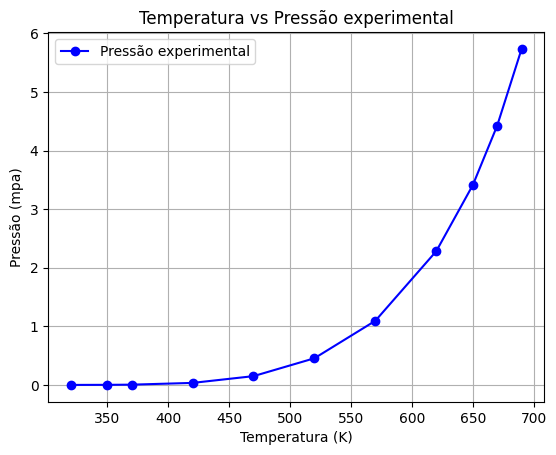

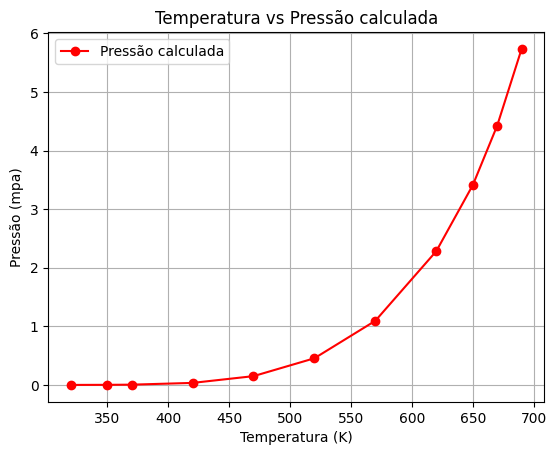

In [12]:
# gráfico da pressãao experimental
plt.figure(1)
plt.plot(T, Pexp, marker='o', label='Pressão experimental', color='blue')
plt.title('Temperatura vs Pressão experimental')
plt.xlabel('Temperatura (K)')
plt.ylabel('Pressão (mpa)')
plt.legend()
plt.grid(True)

# gráfico da pressão calculada
plt.figure(2)
plt.plot(T, Pexp, marker='o', label='Pressão calculada', color='red')
plt.title('Temperatura vs Pressão calculada')
plt.xlabel('Temperatura (K)')
plt.ylabel('Pressão (mpa)')
plt.legend()
plt.grid(True)

plt.show()